In [1]:
import numpy as np
import glob
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

# cm inch transfer for matplotlib
def cm2inch(*tupl):
    inch = 2.54
    return tuple(i/inch for i in tupl)

In [2]:
# cases
cases = np.array([4, 8, 10, 20])
locs = np.array([70, 50, 30, 20, 10])
folderNamePrefix = 'SwBd_Dq56_44M_FLAMELET_LUST_Linear_Sct07_FUEL'

In [3]:
# plot
# figure and axes parameters
# total width is fixed
plot_width      =19.0
margin_left     =1.4
margin_right    =0.3
margin_bottom   =1.2
margin_top      =0.7
space_width     =0.3
space_height    =0.3
ftsize          =11

font = {'family':'serif',
        'weight':'normal',
        'size':ftsize}

# use TEX for interpreter
plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=[r'\usepackage{amsmath}',r'\usepackage{bm}'])
# use serif font
plt.rc('font',**font)

ncols = cases.size
nrows = locs.size

subplot_width = (plot_width
                -margin_left
                -margin_right
                -(ncols-1)*space_width)/ncols
subplot_height = subplot_width * 0.4

plot_height = (nrows*subplot_height
              +margin_bottom
              +margin_top
              +(nrows-1)*space_height)

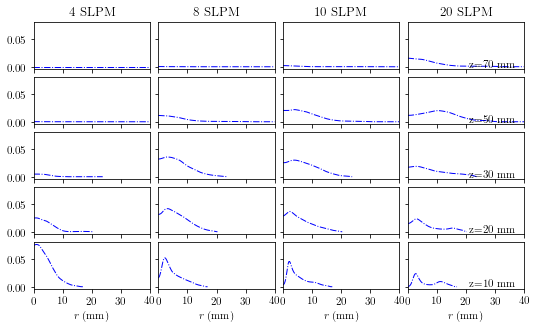

In [10]:
fig, ax = plt.subplots( nrows, ncols, sharex = True, sharey = True,
                        figsize = cm2inch( plot_width, plot_height ) )

for i, case in enumerate(cases):
        
    for j, loc in enumerate(locs):
        
        filename = '{}{:d}/sample_lines/z{:d}.csv'.format(folderNamePrefix, case, loc)
        data = np.genfromtxt(filename, delimiter=',', names=True)
        
        r = data['Points0']*1000
        v = data['ZMean_average']
        
        #ax[j,i].plot(r, v, 'r-', lw=1)
        
        v = data['ZPrime2Mean_average']
        ax[j,i].plot(r, v, 'b-.', lw=1)
        
        v = data['chiMean_average']
        #ax[j,i].plot(r, v, 'k--', lw=1)
        
    ax[0,i].set_title('{:d} SLPM'.format(case))
    ax[-1,i].set_xticks(np.linspace(0,40,num=5))
    ax[-1,i].set_xlabel(r'$r\;(\mathrm{mm})$')
    
for j, loc in enumerate(locs):
    #ax[j,0].set_yticks(np.linspace(0,20,num=3))
    #ax[j,0].set_ylabel(r'$\langle\widetilde{u_z}\rangle\;(\mathrm{m/s})$')
    ax[j,-1].text(21,0.,'z={:d} mm'.format(loc))
        
#ax[0,0].legend(ncol=2, columnspacing=0.4, frameon=False)
ax[0,0].set_xlim([ 0, 40])
#ax[0,0].set_ylim([0, .05])
    
fig.subplots_adjust(
        left = margin_left/plot_width,
        bottom = margin_bottom/plot_height,
        right = 1.0-margin_right/plot_width,
        top = 1.0-margin_top/plot_height,
        wspace = space_width/subplot_width,
        hspace = space_height/subplot_height
        )